In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import plotly.express as px

## I) Preprocessing 1:

In [2]:
df = pd.read_csv("D://stage_ete_SDC_data/data_store_warp/dataframes/data634.csv")

In [3]:
df.head()

,frame_id,mask_id,row_number,pixel_number,label
0,634,634,0,88,1.0
1,634,634,0,88,1.0
2,634,634,0,88,1.0
3,634,634,0,91,1.0
4,634,634,0,91,1.0


<AxesSubplot:xlabel='pixel_number', ylabel='row_number'>

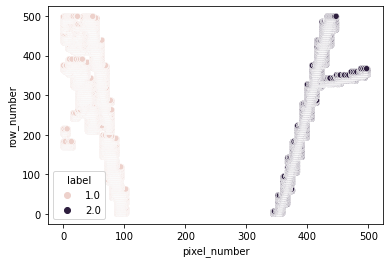

In [4]:
sns.scatterplot(data=df, x="pixel_number", y="row_number", hue="label")

#### 1) Only Left an right lines:

In [5]:
# ## Fixing from 634 to 1045 (left and right) : Done
# for i in range(634,1045):
#     df = pd.read_csv("D://stage_ete_SDC_data/data_store_warp/dataframes/data"+str(i)+".csv")
#     condition = (df.pixel_number < 250)
#     condition_2 = (df.pixel_number >= 250)
#     df.loc[condition, "label"] = 1
#     df.loc[condition_2, "label"] = 2
#     sns.scatterplot(data=df, x="pixel_number", y="row_number", hue="label")
#     plt.title("data"+str(i))
#     plt.show()
#     df.to_csv("D://stage_ete_SDC_data/data_store_warp/dataframes/data"+str(i)+".csv", index=False)

#### 2) Left and right lines with a something on the middle:

In [286]:
## Fixing from 1046 to 1081 : Done
## Fixing from 1253 to 1285 : Done
## Fixing from 1139 to 1161 : Done
## Fixing from 1221 to 1245 : Done
## Fixing 1283 : Done

i = 1283
df = pd.read_csv("D://stage_ete_SDC_data/data_store_warp/dataframes/data"+str(i)+".csv")

In [287]:
fig = px.scatter(df, x="pixel_number", y="row_number", color="label")
fig.show()

In [288]:
condition_1 = (df.pixel_number < 100)
condition_2 = (df.pixel_number > 100) & (df.pixel_number < 300)
condition_3 = (df.pixel_number > 300)
df.loc[condition_1, "label"] = 1
df.loc[condition_2, "label"] = 3
df.loc[condition_3, "label"] = 2

In [289]:
fig = px.scatter(df, x="pixel_number", y="row_number", color="label")
fig.show()

In [290]:
df.to_csv("D://stage_ete_SDC_data/data_store_warp/dataframes/data"+str(i)+".csv", index=False)

#### 3) Add the fixed data frames to the global data frame:

In [291]:
df_glob = pd.read_csv("D:/stage_ete_SDC_data/data_store_warp/df_glob_train.csv")

In [292]:
df_glob.head()

,frame_id,mask_id,row_number,pixel_number,label
0,10470,10470,0,145,3.0
1,10470,10470,0,146,3.0
2,10470,10470,0,147,3.0
3,10470,10470,0,148,3.0
4,10470,10470,0,149,3.0


In [294]:
# for i in tqdm(range(634,1045)):
#     df = pd.read_csv("D://stage_ete_SDC_data/data_store_warp/dataframes/data"+str(i)+".csv")
#     df_glob = pd.concat([df_glob, df])
#     df_glob.reset_index(drop=True, inplace=True)

# for i in tqdm(range(1046,1082)):
#     df = pd.read_csv("D://stage_ete_SDC_data/data_store_warp/dataframes/data"+str(i)+".csv")
#     df_glob = pd.concat([df_glob, df])
#     df_glob.reset_index(drop=True, inplace=True)

# for i in tqdm(range(1253,1286)):
#     df = pd.read_csv("D://stage_ete_SDC_data/data_store_warp/dataframes/data"+str(i)+".csv")
#     df_glob = pd.concat([df_glob, df])
#     df_glob.reset_index(drop=True, inplace=True)
for i in tqdm(range(1139,1162)):
    df = pd.read_csv("D://stage_ete_SDC_data/data_store_warp/dataframes/data"+str(i)+".csv")
    df_glob = pd.concat([df_glob, df])
    df_glob.reset_index(drop=True, inplace=True)
for i in tqdm(range(1221,1246)):
    df = pd.read_csv("D://stage_ete_SDC_data/data_store_warp/dataframes/data"+str(i)+".csv")
    df_glob = pd.concat([df_glob, df])
    df_glob.reset_index(drop=True, inplace=True)
for i in tqdm(range(1276,1283)):
    df = pd.read_csv("D://stage_ete_SDC_data/data_store_warp/dataframes/data"+str(i)+".csv")
    df_glob = pd.concat([df_glob, df])
    df_glob.reset_index(drop=True, inplace=True)



100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.55it/s]


In [295]:
df_glob.duplicated().sum()

1700042

In [300]:
df_glob.loc[df_glob.duplicated() == True, "frame_id"]

5379561     634
5379562     634
5379563     634
5379564     634
5379565     634
           ... 
7675854    1282
7675855    1282
7675856    1282
7675857    1282
7675858    1282
Name: frame_id, Length: 1700042, dtype: int64

In [301]:
df_glob.drop_duplicates(keep='last', inplace=True)
df_glob.reset_index(drop=True, inplace=True)

In [302]:
## Transductive learning (label propagation)
from sklearn.semi_supervised import LabelPropagation
import pickle as pkl

In [303]:
model = LabelPropagation(n_neighbors=3, kernel='knn', n_jobs=3)

In [304]:
X_train_glob = df_glob.iloc[:,:-1]
y_train_glob = df_glob.iloc[:,-1]

In [305]:
model.fit(X_train_glob, y_train_glob)

LabelPropagation(kernel='knn', n_jobs=3, n_neighbors=3)

In [306]:
model.score(X_train_glob, y_train_glob)

0.9999979919063786

In [307]:
df_glob.to_csv("D:/stage_ete_SDC_data/data_store_warp/df_glob_train.csv", index = False)

In [308]:
pkl.dump(model, open("D:/stage_ete_SDC_data/MLModels/Model_label_propagation_warp.pkl", "wb"))

## II) Preprocessing 2:

#### 1) Only Left an right lines:

In [ ]:
## Fixing from 1473,3281 (left and right) : Done
for i in range(1473,3282):
    df = pd.read_csv("D://stage_ete_SDC_data/data_store/dataframes/data"+str(i)+".csv")
    df["label"] = df["label_2"]
    df.drop(["label_2"], axis=1, inplace=True)
    condition_1 = (df.pixel_number < 300)
    condition_2 = (df.pixel_number > 300)
    df.loc[condition_1, "label"] = 1
    df.loc[condition_2, "label"] = 2
    sns.scatterplot(data=df, x="pixel_number", y="row_number", hue="label")
    plt.title("data"+str(i))
    plt.show()
    df.to_csv("D://stage_ete_SDC_data/data_store/dataframes/data"+str(i)+".csv", index=False)
print("-----------------------------------")
## Fixing from 3288,3606 (left and right) : Done
for i in range(3288,3607):
    df = pd.read_csv("D://stage_ete_SDC_data/data_store/dataframes/data"+str(i)+".csv")
    df["label"] = df["label_2"]
    df.drop(["label_2"], axis=1, inplace=True)
    condition_1 = (df.pixel_number < 300)
    condition_2 = (df.pixel_number > 300)
    df.loc[condition_1, "label"] = 1
    df.loc[condition_2, "label"] = 2
    sns.scatterplot(data=df, x="pixel_number", y="row_number", hue="label")
    plt.title("data"+str(i))
    plt.show()
    df.to_csv("D://stage_ete_SDC_data/data_store/dataframes/data"+str(i)+".csv", index=False)
print("-----------------------------------")
## Fixing from 3635,4158 (left and right) : Done
for i in range(3635,4159):
    df = pd.read_csv("D://stage_ete_SDC_data/data_store/dataframes/data"+str(i)+".csv")
    df["label"] = df["label_2"]
    df.drop(["label_2"], axis=1, inplace=True)
    condition_1 = (df.pixel_number < 300)
    condition_2 = (df.pixel_number > 300)
    df.loc[condition_1, "label"] = 1
    df.loc[condition_2, "label"] = 2
    sns.scatterplot(data=df, x="pixel_number", y="row_number", hue="label")
    plt.title("data"+str(i))
    plt.show()
    df.to_csv("D://stage_ete_SDC_data/data_store/dataframes/data"+str(i)+".csv", index=False)
print("-----------------------------------")
## Fixing from 4182,4375 (left and right) : Done
for i in range(4182,4376):
    df = pd.read_csv("D://stage_ete_SDC_data/data_store/dataframes/data"+str(i)+".csv")
    df["label"] = df["label_2"]
    df.drop(["label_2"], axis=1, inplace=True)
    condition_1 = (df.pixel_number < 300)
    condition_2 = (df.pixel_number > 300)
    df.loc[condition_1, "label"] = 1
    df.loc[condition_2, "label"] = 2
    sns.scatterplot(data=df, x="pixel_number", y="row_number", hue="label")
    plt.title("data"+str(i))
    plt.show()
    df.to_csv("D://stage_ete_SDC_data/data_store/dataframes/data"+str(i)+".csv", index=False)

#### 2) Add the fixed data frames to the global data frame:

In [ ]:
df_glob = pd.read_csv("D:/stage_ete_SDC_data/data_store/df_glob_train.csv")

In [ ]:
df_glob.head()

In [ ]:
for i in tqdm(range(1473,3282)):
    df = pd.read_csv("D://stage_ete_SDC_data/data_store/dataframes/data"+str(i)+".csv")
    df_glob = pd.concat([df_glob, df])
    df_glob.reset_index(drop=True, inplace=True)

for i in tqdm(range(3288,3607)):
    df = pd.read_csv("D://stage_ete_SDC_data/data_store/dataframes/data"+str(i)+".csv")
    df_glob = pd.concat([df_glob, df])
    df_glob.reset_index(drop=True, inplace=True)

for i in tqdm(range(3635,4159)):
    df = pd.read_csv("D://stage_ete_SDC_data/data_store/dataframes/data"+str(i)+".csv")
    df_glob = pd.concat([df_glob, df])
    df_glob.reset_index(drop=True, inplace=True)

for i in tqdm(range(4182,4376)):
    df = pd.read_csv("D://stage_ete_SDC_data/data_store/dataframes/data"+str(i)+".csv")
    df_glob = pd.concat([df_glob, df])
    df_glob.reset_index(drop=True, inplace=True)

In [ ]:
df_glob.duplicated().sum()

In [ ]:
## Transductive learning (label propagation)
from sklearn.semi_supervised import LabelPropagation

In [ ]:
model = LabelPropagation(n_neighbors=3, kernel='knn')

In [ ]:
X_train_glob = df_glob.iloc[:,:-1]
y_train_glob = df_glob.iloc[:,-1]

In [ ]:
model.fit(X_train_glob, y_train_glob)

In [ ]:
model.score(X_train_glob, y_train_glob)

In [ ]:
# df_glob.to_csv("D:/stage_ete_SDC_data/data_store/df_glob_train.csv", index = False)

In [ ]:
# pkl.dump(model, open("D:/stage_ete_SDC_data/MLModels/Model_label_propagation.pkl", "wb"))

In [ ]:
df_glob.shape